# Band Calculations

We define a standard high-symmetry k-point path (Γ–M–K–Γ) in the Bands{} input block, run the provided Python script to generate bandstructure data, and then visualize the results using the supplied Jupyter notebook.


`Bands{}` block in the input is as follows:

```
    Bands {
         path = {
              0.0        0.0       0.0
             -0.5       -0.5       0.0
             -0.666667  -0.333333  0.0
              0.0        0.0       0.0
         }

         labels = { G M K G }
         npoints = 21                     

    }
```    

We provide [dftbephy-bands.py](https://github.com/CoMeT4MatSci/dftbephy/blob/master/scripts/dftbephy-bands.py) for electronic and phononic band calculations.
After updating the path to the source code of DFTBephy in the script, it can be run with the following command.

```
python graphene-bands.py
```

The calculated electronic and phononic band structures are saved in `path_el_bandstructure.json` and `path_ph_bandstructure.json`, respectively.
The band structures can be plotted by using [`Graphene-Bands.ipynb`](https://github.com/CoMeT4MatSci/dftbephy/blob/master/notebooks/Graphene-Bands.ipynb):

In [7]:
import os

import numpy as np
import matplotlib.pyplot as plt

import json

In [8]:
basedir='./'

## Electronic Band Sructure

The `path_el_bandstructure.json` file contains bandstructure info along a high-symmetry k-path:
 - highSymIndices / highSymLabels: tick positions/labels for high-symmetry points
 - wavevectorCoordinatesCart: k-points in Cartesian reciprocal coords
 - energies [eV]: eigenvalues for each k-point and band (shape: [Nk, Nbands])

In [9]:
with open(basedir +'../el-ph/path_el_bandstructure.json') as jfile:
    data = json.load(jfile)
data = json.loads(data)

indices = np.array(data['highSymIndices'])
indices = indices-1
indices[0] = 0
labels = data['highSymLabels']
qpoints = np.array(data['wavevectorCoordinatesCart'])
energies = np.array(data['energies'])

q_dist_dftb = [0.,]
for i in range(1, qpoints.shape[0]):    q_dist_dftb.append(np.linalg.norm(qpoints[i,:]-qpoints[i-1,:]))

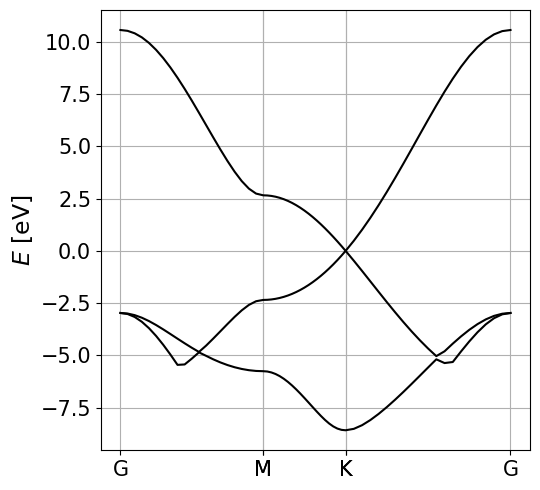

In [10]:
val=energies[:, 3]
cond=energies[:, 4]

index = np.where(cond == min(cond))[0][0]
#print(index)

nb0 = 2 # first band to show
nb1 = 4 # last band to show

#mid-gap value
EF=-4.6585

fig = plt.figure(figsize=(5.5,5))
ax1 = fig.add_subplot(1, 1, 1)

for m in range(nb0, nb1+1):
    ax1.plot(np.cumsum(q_dist_dftb), energies[:, m]-EF, color='black')

FontSize= 15
    
ax1.set_xticks(np.cumsum(q_dist_dftb)[indices])
ax1.set_xticklabels(labels)
ax1.set_ylabel(r'$E$ [eV]', fontsize=FontSize+2)
plt.xticks(fontsize=FontSize)
plt.yticks(fontsize=FontSize)

plt.tight_layout()
plt.grid()
plt.show()
#plt.savefig(basedir +'../Figures/graphene-electronic_bandstructure.png')

## Phonon Dispersion

The `path_ph_bandstructure.json` file contains phonon dispersion along a high-symmetry q-path:
 - wavevectorCoordinatesCart: q-points in Cartesian reciprocal coords
 - frequencies [eV]: phonon frequencies for each q-point and branch (shape: [Nq, Nbranches])
 - highSymIndices / highSymLabels: tick locations/labels for high-symmetry points

In [11]:
with open(basedir +'../el-ph/path_ph_bandstructure.json') as jfile:
    data = json.load(jfile)
data = json.loads(data)

indices = np.array(data['highSymIndices'])
indices = indices-1
indices[0] = 0
labels = data['highSymLabels']
qpoints = np.array(data['wavevectorCoordinatesCart'])
frequencies = np.array(data['frequencies'])

q_dist_dftb = [0.,]
for i in range(1, qpoints.shape[0]):
    q_dist_dftb.append(np.linalg.norm(qpoints[i,:]-qpoints[i-1,:]))

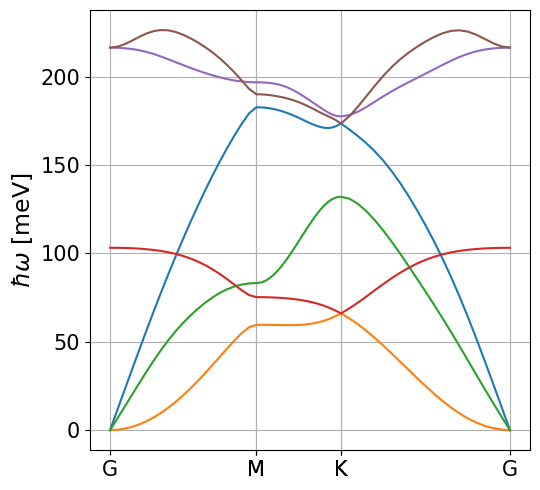

In [12]:
fig = plt.figure(figsize=(5.5,5))
ax1 = fig.add_subplot(1, 1, 1)

for m in range(frequencies.shape[1]):
    ax1.plot(np.cumsum(q_dist_dftb), frequencies[:, m]*1e3)
        
ax1.set_xticks(np.cumsum(q_dist_dftb)[indices])
ax1.set_xticklabels(labels)
ax1.set_ylabel(r'$\hbar \omega$ [meV]', fontsize=FontSize+2)
plt.xticks(fontsize=FontSize)
plt.yticks(fontsize=FontSize)

plt.tight_layout()
plt.grid()
plt.show()
#plt.savefig(basedir +'../Figures/graphene-phonon_bandstructure.png')